In [18]:
import string
import json
from datetime import datetime
from statistics import mean

import hmm
import utils
from discriminator import Discriminator

In [2]:
# HMM parameters
x = 5
y = string.ascii_lowercase[:5]
s = [1.0] + [0.0] * (x - 1)

# CNN parameters
runs = 20
epochs = 20
epoch_size = 500
batch_size = 200
seq_len = 20
pool_size = 8

In [3]:
def test_model(model_name):
    acc_hists = []
    loss_hists = []

    for i in range(runs):
        print(f"Run {i+1}")
        real_hmm = hmm.random_hmm(x, y, s)

        d = Discriminator(
            real_hmm,
            epoch_size,
            batch_size,
            seq_len,
            model=model_name,
            pool_size=pool_size,
        )

        acc_hist, loss_hist = d.initial_train(epochs)
        acc_hists.append([float(x) for x in acc_hist])
        loss_hists.append([float(x) for x in loss_hist])
        print(f"Final acc: {acc_hist[-1]}")
        print(f"Final loss: {loss_hist[-1]}")
    
    exp_data = {
        "model": model_name,
        "acc_histories": acc_hists,
        "loss_histories": loss_hists,
    }

    exp_file = f'experiments/exp_{datetime.now().strftime("%y%m%d-%H%M%S%f")}.json'
    with open(exp_file, "w") as f:
        json.dump(exp_data, f, indent=4)
    
    return acc_hists, loss_hists, d._model

## CNN Model 3

In [4]:
acc_hists_3, loss_hists_3, model_3 = test_model("CNNModel3")

Run 1
Final acc: 0.9625499844551086
Final loss: 0.11400054770056159
Run 2
Final acc: 0.9313300251960754
Final loss: 0.18960177622549235
Run 3
Final acc: 0.9409300088882446
Final loss: 0.16428718304540962
Run 4
Final acc: 0.9291599988937378
Final loss: 0.18676814437098802
Run 5
Final acc: 0.8240900039672852
Final loss: 0.38036569402366877
Run 6
Final acc: 0.8927900195121765
Final loss: 0.2765233970507979
Run 7
Final acc: 0.925279974937439
Final loss: 0.20263407929986715
Run 8
Final acc: 0.9385499954223633
Final loss: 0.17599964925460518
Run 9
Final acc: 0.9447100162506104
Final loss: 0.15643428918346763
Run 10
Final acc: 0.9137200117111206
Final loss: 0.22163543481379747
Run 11
Final acc: 0.9250199794769287
Final loss: 0.19774801899120212
Run 12
Final acc: 0.9549499750137329
Final loss: 0.12931159083731472
Run 13
Final acc: 0.9916499853134155
Final loss: 0.028053074976662176
Run 14
Final acc: 0.8680800199508667
Final loss: 0.32000894337147473
Run 15
Final acc: 0.9687399864196777
Final l

In [5]:
model_3.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_39 (Conv1D)           (None, 18, 32)            512       
_________________________________________________________________
activation_115 (Activation)  (None, 18, 32)            0         
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 9, 32)             0         
_________________________________________________________________
conv1d_40 (Conv1D)           (None, 7, 64)             6208      
_________________________________________________________________
activation_116 (Activation)  (None, 7, 64)             0         
_________________________________________________________________
global_max_pooling1d_20 (Glo (None, 64)                0         
_________________________________________________________________
dense_77 (Dense)             (None, 128)             

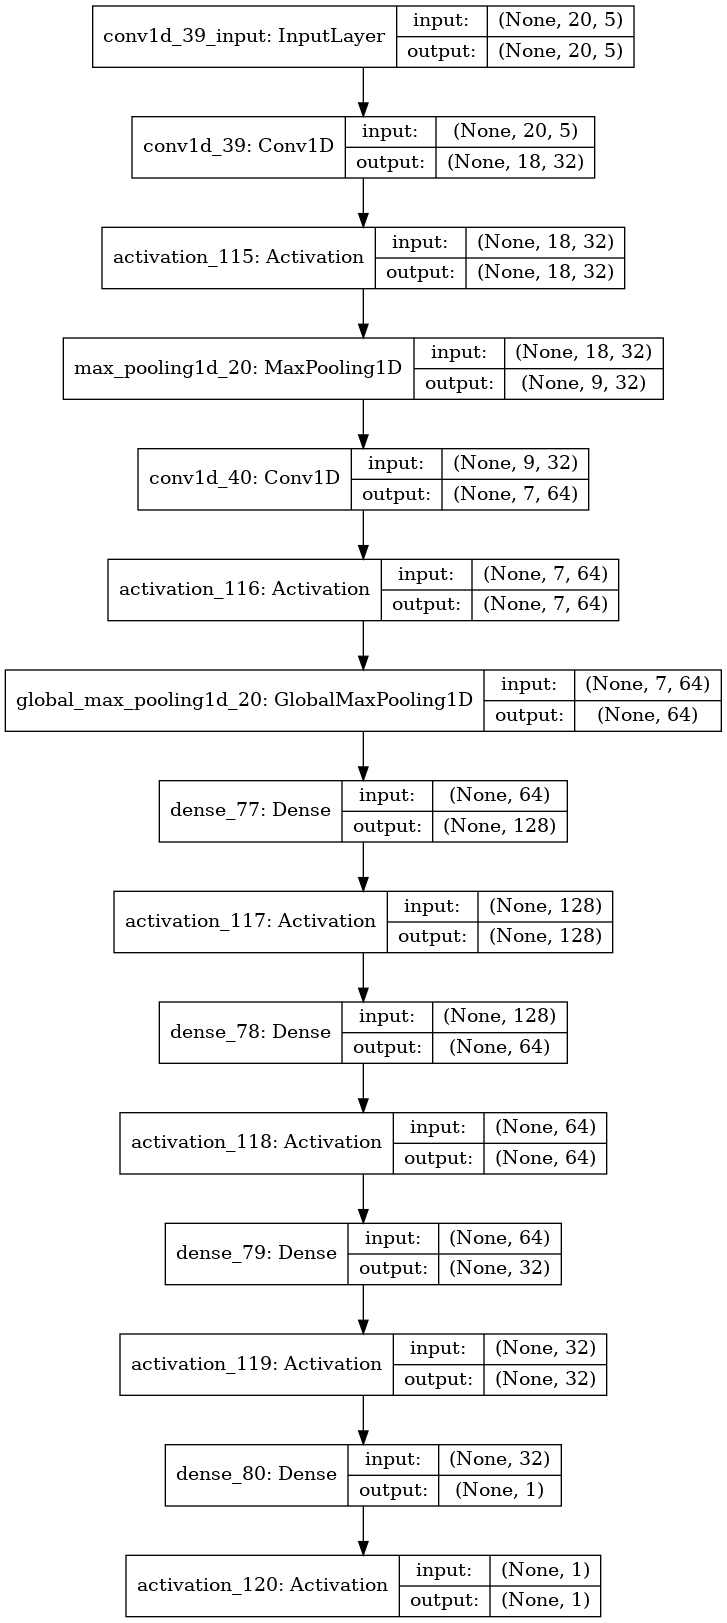

In [6]:
utils.plot_model(model_3, "images/cnn3_arch.png")

In [24]:
mean_final_acc = mean([acc_hist[-1] for acc_hist in acc_hists_3])
mean_final_loss = mean([loss_hist[-1] for loss_hist in loss_hists_3])

print(f"Mean final loss: {mean_final_loss}")
print(f"Mean final acc: {mean_final_acc}")

Mean final loss: 0.18514723026319407
Mean final acc: 0.9299674987792969


## CNN Model 4

In [7]:
acc_hists_4, loss_hists_4, model_4 = test_model("CNNModel4")

Run 1
Final acc: 0.9955899715423584
Final loss: 0.015410071519814664
Run 2
Final acc: 0.9962900280952454
Final loss: 0.012887444419116946
Run 3
Final acc: 0.9972500205039978
Final loss: 0.010002845074224751
Run 4
Final acc: 0.9967100024223328
Final loss: 0.011114005063802324
Run 5
Final acc: 0.9941800236701965
Final loss: 0.020645521715574433
Run 6
Final acc: 0.9871100187301636
Final loss: 0.04285636389942374
Run 7
Final acc: 0.9843199849128723
Final loss: 0.05169677407492418
Run 8
Final acc: 0.9948700070381165
Final loss: 0.0184380976887187
Run 9
Final acc: 0.9975200295448303
Final loss: 0.008841240530928189
Run 10
Final acc: 0.9929900169372559
Final loss: 0.024576135747542138
Run 11
Final acc: 0.9929900169372559
Final loss: 0.023569189235044176
Run 12
Final acc: 0.9932799935340881
Final loss: 0.022295595133473397
Run 13
Final acc: 0.9931899905204773
Final loss: 0.021892298950930127
Run 14
Final acc: 0.9935200214385986
Final loss: 0.023586977771192324
Run 15
Final acc: 0.9948999881744

In [8]:
model_4.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_79 (Conv1D)           (None, 18, 128)           2048      
_________________________________________________________________
activation_235 (Activation)  (None, 18, 128)           0         
_________________________________________________________________
max_pooling1d_40 (MaxPooling (None, 9, 128)            0         
_________________________________________________________________
conv1d_80 (Conv1D)           (None, 7, 128)            49280     
_________________________________________________________________
activation_236 (Activation)  (None, 7, 128)            0         
_________________________________________________________________
global_max_pooling1d_40 (Glo (None, 128)               0         
_________________________________________________________________
dense_157 (Dense)            (None, 256)             

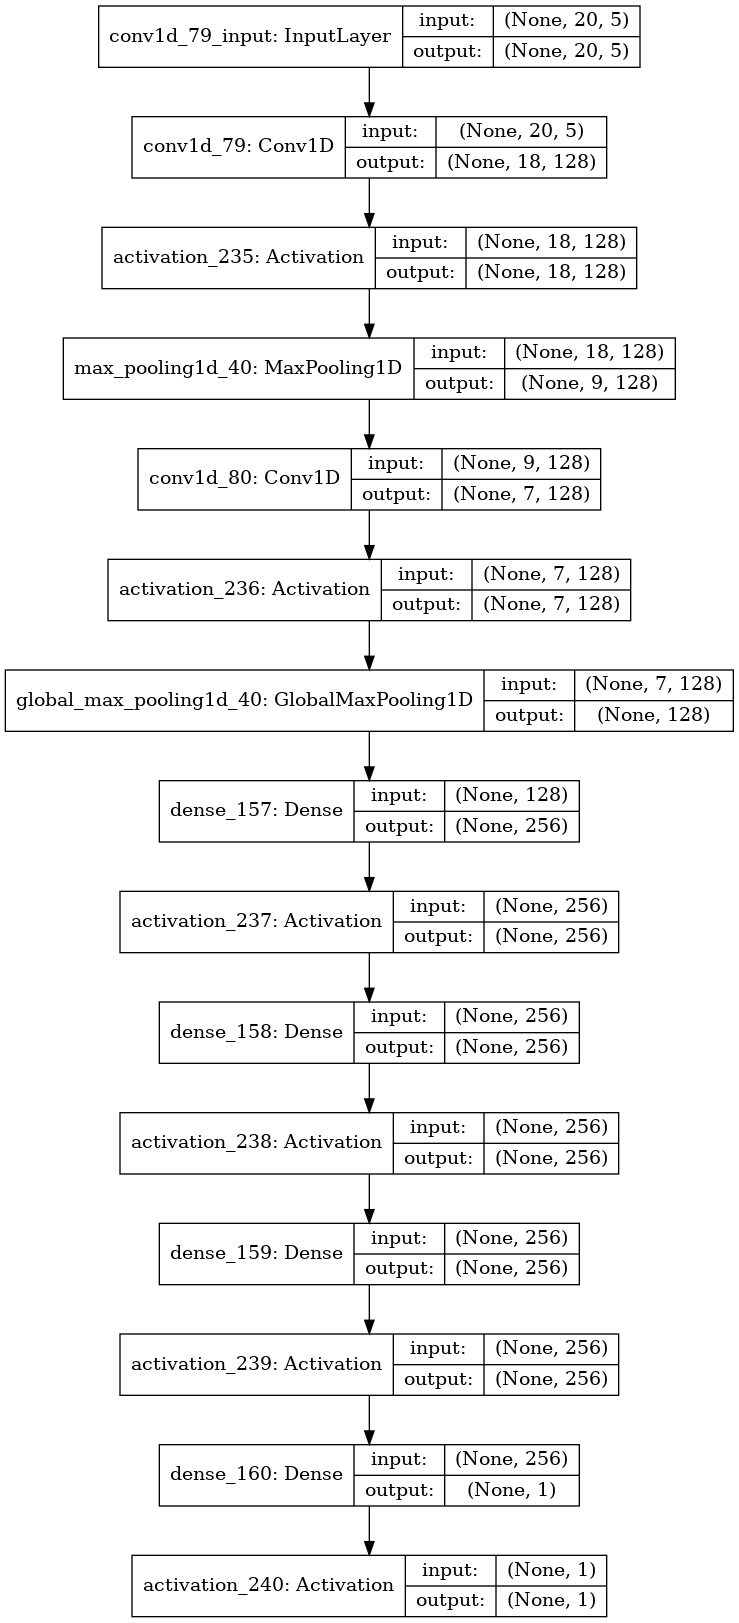

In [9]:
utils.plot_model(model_4, "images/cnn4_arch.png")

In [25]:
mean_final_acc = mean([acc_hist[-1] for acc_hist in acc_hists_4])
mean_final_loss = mean([loss_hist[-1] for loss_hist in loss_hists_4])

print(f"Mean final loss: {mean_final_loss}")
print(f"Mean final acc: {mean_final_acc}")

Mean final loss: 0.019855725439280103
Mean final acc: 0.9942555069923401


## CNN Model 5

In [10]:
acc_hists_5, loss_hists_5, model_5 = test_model("CNNModel5")

Run 1
Final acc: 0.9716600179672241
Final loss: 0.07970054190605878
Run 2
Final acc: 0.9944700002670288
Final loss: 0.020122132693359163
Run 3
Final acc: 0.9812700152397156
Final loss: 0.055575692431535574
Run 4
Final acc: 0.9921200275421143
Final loss: 0.025250793025363236
Run 5
Final acc: 0.982699990272522
Final loss: 0.05106873611384071
Run 6
Final acc: 0.9835399985313416
Final loss: 0.049346397438785064
Run 7
Final acc: 0.9884600043296814
Final loss: 0.04028104595153127
Run 8
Final acc: 0.9869700074195862
Final loss: 0.03840529649879318
Run 9
Final acc: 0.9936400055885315
Final loss: 0.01909447106483276
Run 10
Final acc: 0.992330014705658
Final loss: 0.024902311773155817
Run 11
Final acc: 0.9881899952888489
Final loss: 0.03505035131692421
Run 12
Final acc: 0.9918199777603149
Final loss: 0.02489267121232115
Run 13
Final acc: 0.9916800260543823
Final loss: 0.0269758887096541
Run 14
Final acc: 0.9931700229644775
Final loss: 0.020277498506504343
Run 15
Final acc: 0.990119993686676
Fina

In [11]:
model_5.summary()

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_119 (Conv1D)          (None, 18, 128)           2048      
_________________________________________________________________
activation_355 (Activation)  (None, 18, 128)           0         
_________________________________________________________________
max_pooling1d_60 (MaxPooling (None, 9, 128)            0         
_________________________________________________________________
conv1d_120 (Conv1D)          (None, 7, 128)            49280     
_________________________________________________________________
activation_356 (Activation)  (None, 7, 128)            0         
_________________________________________________________________
global_max_pooling1d_60 (Glo (None, 128)               0         
_________________________________________________________________
dense_237 (Dense)            (None, 256)             

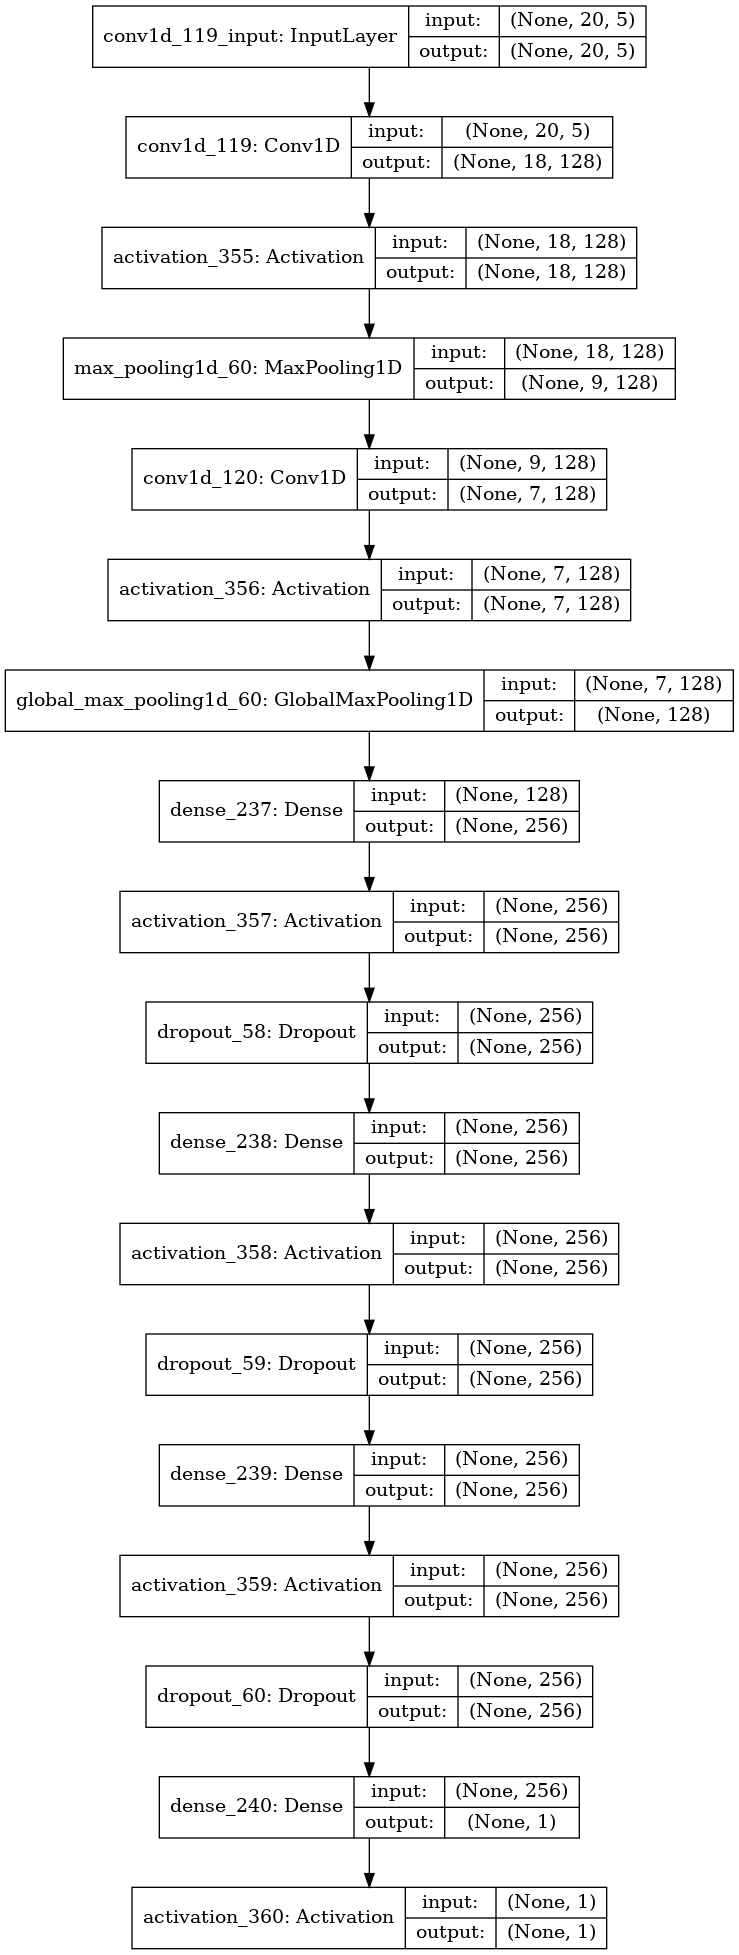

In [12]:
utils.plot_model(model_5, "images/cnn5_arch.png")

In [26]:
mean_final_acc = mean([acc_hist[-1] for acc_hist in acc_hists_5])
mean_final_loss = mean([loss_hist[-1] for loss_hist in loss_hists_5])

print(f"Mean final loss: {mean_final_loss}")
print(f"Mean final acc: {mean_final_acc}")

Mean final loss: 0.03470181653556501
Mean final acc: 0.9886390030384063


## CNN Model 6

In [13]:
acc_hists_6, loss_hists_6, model_6 = test_model("CNNModel6")

Run 1
Final acc: 0.9971399903297424
Final loss: 0.010168065012923761
Run 2
Final acc: 0.9971699714660645
Final loss: 0.00983981680094439
Run 3
Final acc: 0.9965800046920776
Final loss: 0.011463274362453375
Run 4
Final acc: 0.996150016784668
Final loss: 0.013914645005243073
Run 5
Final acc: 0.9970800280570984
Final loss: 0.010755188203656871
Run 6
Final acc: 0.9871699810028076
Final loss: 0.03980001575636561
Run 7
Final acc: 0.9967300295829773
Final loss: 0.011732742758897075
Run 8
Final acc: 0.9958800077438354
Final loss: 0.014325536056494457
Run 9
Final acc: 0.9964500069618225
Final loss: 0.011770570739805407
Run 10
Final acc: 0.9963799715042114
Final loss: 0.01306245767843211
Run 11
Final acc: 0.9954400062561035
Final loss: 0.016001181989733597
Run 12
Final acc: 0.9967799782752991
Final loss: 0.011816650160391873
Run 13
Final acc: 0.9967100024223328
Final loss: 0.01164780970783977
Run 14
Final acc: 0.9947500228881836
Final loss: 0.019159028001886326
Run 15
Final acc: 0.99791002273559

In [14]:
model_6.summary()

Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_159 (Conv1D)          (None, 18, 256)           4096      
_________________________________________________________________
activation_513 (Activation)  (None, 18, 256)           0         
_________________________________________________________________
max_pooling1d_80 (MaxPooling (None, 9, 256)            0         
_________________________________________________________________
conv1d_160 (Conv1D)          (None, 7, 256)            196864    
_________________________________________________________________
activation_514 (Activation)  (None, 7, 256)            0         
_________________________________________________________________
global_max_pooling1d_80 (Glo (None, 256)               0         
_________________________________________________________________
dense_355 (Dense)            (None, 512)             

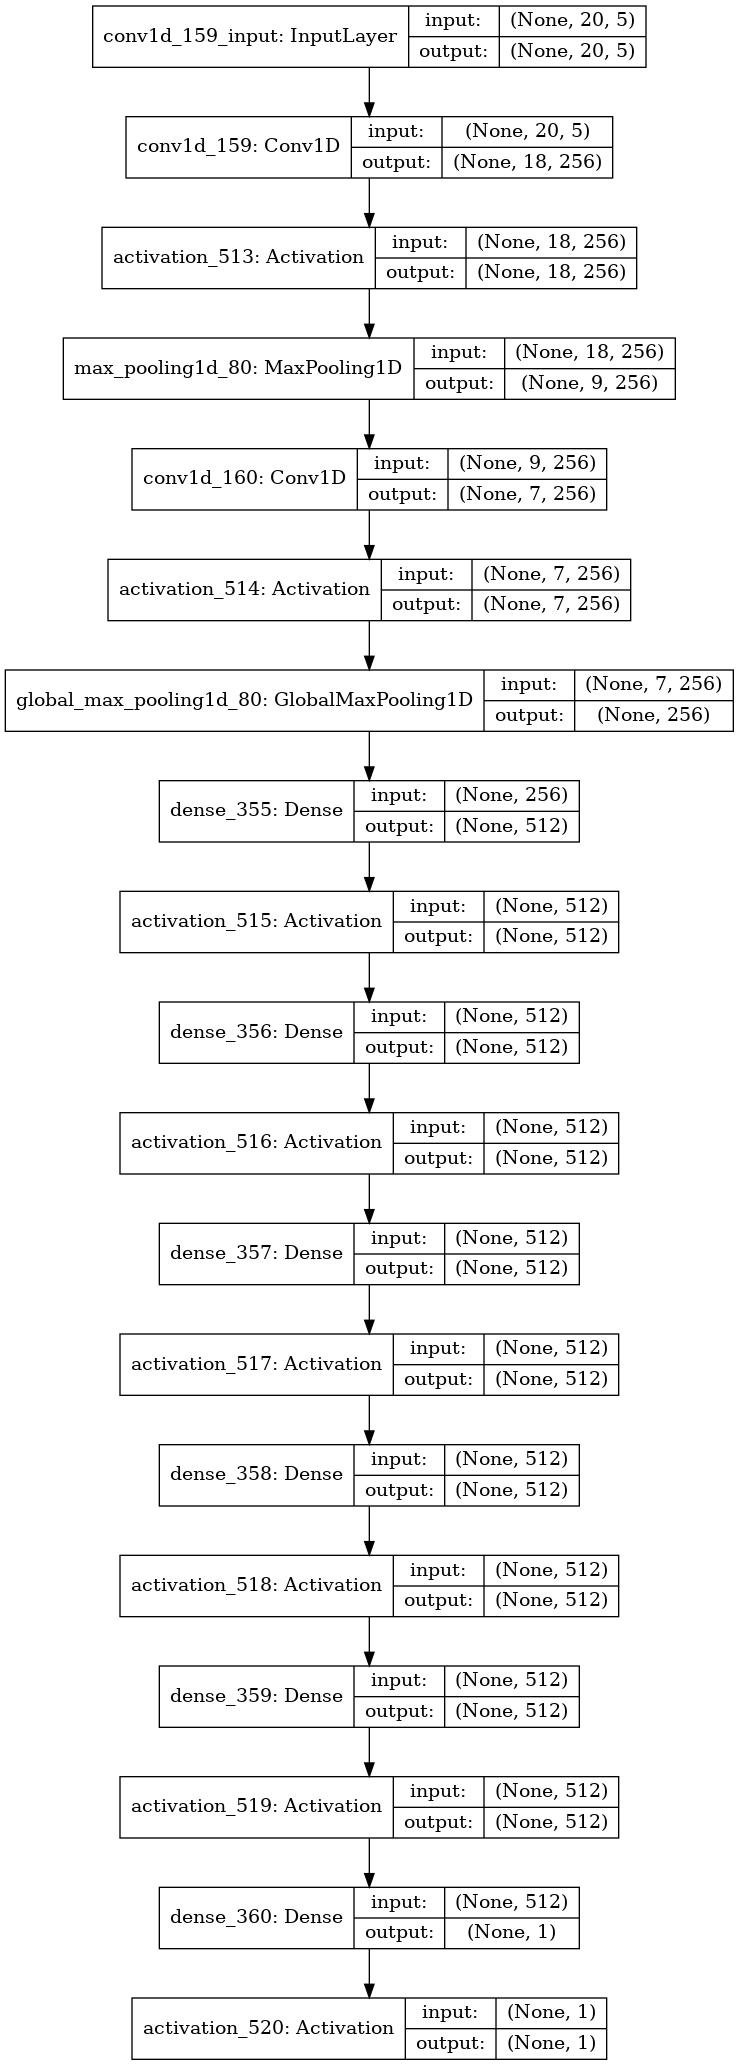

In [15]:
utils.plot_model(model_6, "images/cnn6_arch.png")

In [27]:
mean_final_acc = mean([acc_hist[-1] for acc_hist in acc_hists_6])
mean_final_loss = mean([loss_hist[-1] for loss_hist in loss_hists_6])

print(f"Mean final loss: {mean_final_loss}")
print(f"Mean final acc: {mean_final_acc}")

Mean final loss: 0.013777668090715633
Mean final acc: 0.9960175037384034
